In [255]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [256]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 3: Modelo Lineal

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [257]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

Realice el preprocesamiento que considere adecuado para que las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__, __Embarked__ y __Survived__ puedan ser utilizadas por un modelo lineal.

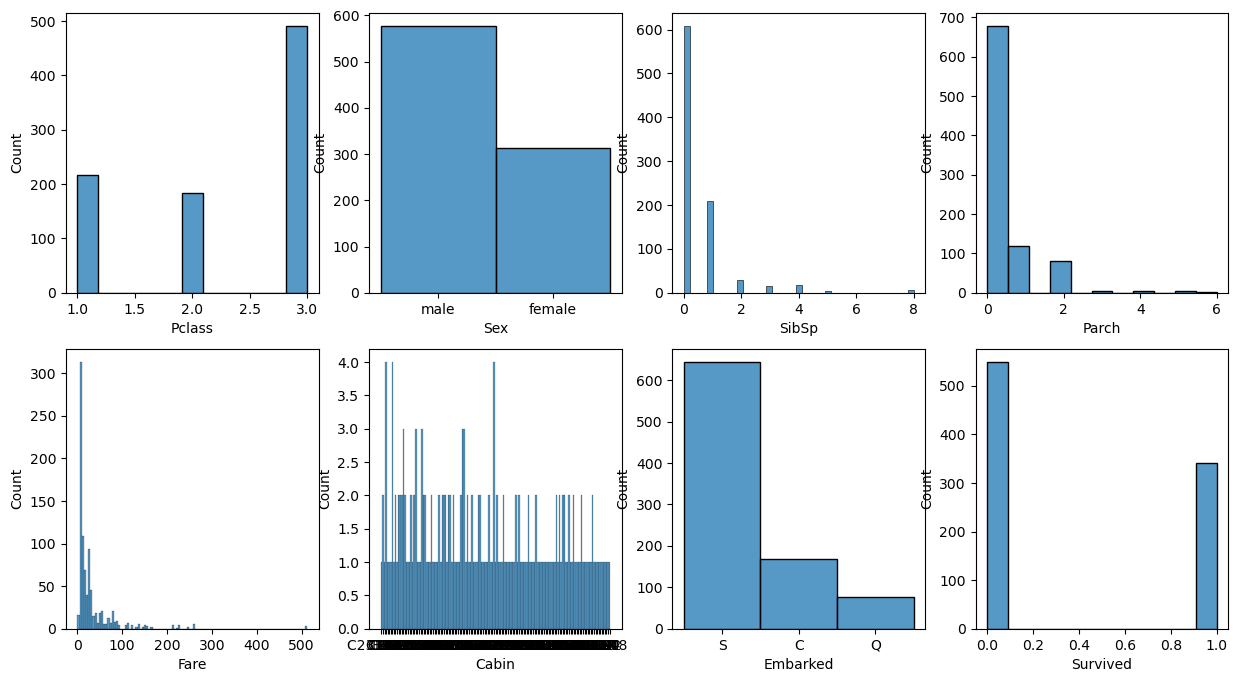

In [258]:
columns1 = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Cabin", "Embarked", "Survived"]
fig, axs = plt.subplots(ncols=4, nrows= 2, figsize=(15, 8))

for i, col in enumerate(columns1):
    sns.histplot(data = df, x = col, ax = axs[i // 4, i % 4])

In [259]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [260]:
def scaled_dataframe(data):
    data_scaled = data
    for i in data.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            min_r = np.amin(df[i])
            max_r = np.amax(df[i])

            data_scaled[i] = (df[i]-min_r)/(max_r-min_r)

    return data_scaled

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

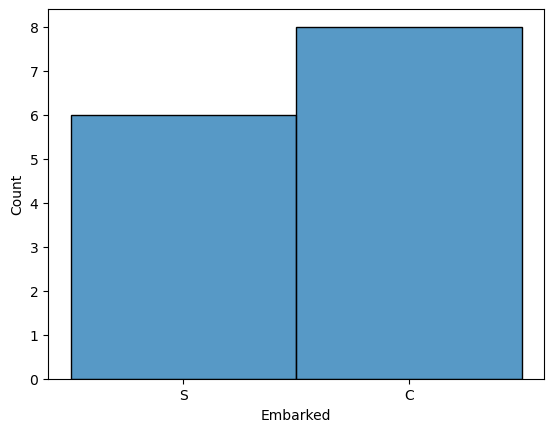

In [261]:
# Los datos más parecidos a los valores nulos en ambarked
embarked_sim = df.query('Pclass == 1 and Survived == 1 and Sex == "female" and Fare <= 80 and SibSp == 0 and Parch == 0')
sns.histplot(data = embarked_sim, x="Embarked")

In [262]:
# Mejoramos la asimetría
tarifa = np.where(df["Fare"] == 0, np.mean(df["Fare"]), df["Fare"])
df["Fare"] = np.sqrt(tarifa)
df["SibSp"] = np.sqrt(df["SibSp"])
df["Parch"] = np.sqrt(df["Parch"])

# Eliminamos la columna de la cabina
df = df.drop(["Cabin"], axis = 1)

# Completamos los datos nulos de embarcación
replaces = df[df["Embarked"].isnull()].index 
df.loc[replaces, 'Embarked'] = "C"

In [263]:
mean_fare = []
for i in range(1,4):
    mean_fare.append(df[df["Pclass"] == i].Fare.mean())
    
for i in df[df["Fare"] == 0].index:
    if df["Pclass"][i] == 1:
        df["Fare"][i] = mean_fare[0]
    elif df["Pclass"][i] == 1:
        df["Fare"][i] = mean_fare[1]
    else:
        df["Fare"][i] = mean_fare[2]

In [264]:
col_oneh = ["Sex", "Embarked"]
df = df.drop("PassengerId", axis = 1)

for i in col_oneh:
    one_hot = pd.get_dummies(df[i])
    df = df.drop(i, axis = 1)
    df = df.join(one_hot)

In [265]:
df_op = scaled_dataframe(df)
df_op.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.367921,0.136219,0.119784,0.142676,0.352413,0.647587,0.190797,0.086420,0.722783
std,0.486592,0.418036,0.182540,0.216501,0.222050,0.139515,0.477990,0.477990,0.393150,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.247612,0.000000,0.000000,0.039358,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.091256,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.472229,0.353553,0.000000,0.177968,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Asignación 2 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir __Survived__ utilizando el algoritmo _pocket_. Imprima el error obtenido.

In [266]:
df_2 = df_op[['Pclass', 'female', 'male', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']]
survived = df_op['Survived'].values

In [267]:
def train_pla(data, target, max_iters=1000) -> np.array: 
    
    # CÓDIGO AQUÍ
    predicts = np.zeros(data.shape[0],)
    missclassified = True
    iters = 0

    # Inicializamos w(0) aleatoriamente
    model = np.random.rand(data.shape[1] + 1)

    x_0 = np.ones((data.shape[0] ,), dtype=int)
    x = np.insert(data, 0, x_0, axis=1)

    # Mientras existan puntos sin clasificar
    while missclassified and iters < max_iters:

        # Calculamos cada h(x)
        for i, fila in enumerate(data):
            sum_wx = np.dot(model[1:data.shape[1]+ 1, ], fila) + model[0]
            predicts[i] = np.sign(sum_wx)
        
        # Obtenemos los índices de los datos sin clasificar
        missing = np.where(predicts != target)

        # Si no hay datos diferentes, termina el algoritmo
        if not np.any(missing):
            missclassified = False
            break        
        else:
            # Escogemos un punto que aún no está clasificado
            t = np.random.choice(missing[0])
            # t = missing[0][0]
            # Actulizamos w(t)
            model = model + target[t]*x[t]

        iters = iters + 1
            
    return model

In [268]:
def pocket_algorithm(data, target, max_iters= 1000):

    nrow = data.shape[0]
    ncol = data.shape[1]
    iters = 0
    error = 1000
    missclassified = True

    # Set pocket weight vector w
    w = train_pla(data=data.values, target=target, max_iters=1)

    while missclassified and iters < max_iters:
        # Obtenemos w(t + 1)
        w_t = train_pla(data=data.values, target=target, max_iters=1)

        # Evaluamos el error
        w_tx = np.dot(w_t[1:ncol+ 1, ], data.values.T)
        w_tx = (w_tx - np.mean(w_tx))/np.std(w_tx)
        w_tx = np.sign(w_tx)
        sum_wx = 0
        for i, val in enumerate(w_tx):
            if val == -1:
                val = 0
            if val != target[i]:
                sum_wx = sum_wx + 1

        error_in = sum_wx / nrow

        if sum_wx == 0:
            missclassified = False
            break
        
        # Si es menor el error, actualizamos
        if error_in < error:
            print('E', iters, '=', error_in)
            w = w_t
            error = error_in
        iters = iters + 1

    return w

In [269]:
pocket_algorithm(df_2, survived, 1000)

E 0 = 0.39730639730639733
E 1 = 0.38608305274971944
E 6 = 0.30303030303030304
E 7 = 0.2558922558922559
E 80 = 0.2143658810325477


array([0.64486423, 0.2137314 , 0.71165212, 0.03126972, 0.12172954,
       0.04021606, 0.22463194, 0.60337737, 0.18594824, 0.40251367])

## Asignación 3 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Cabin__ y __Embarked__, entrene una regresión lineal para predecir __Fare__ utilizando el algoritmo de Ordinary Leasts Squares (OLS). Imprima el valor del error cuadrático medio (MSE).

In [270]:
df_3 = df_op[['Pclass', 'female', 'male', 'SibSp', 'Parch', 'C', 'Q', 'S']]
fare = df_op['Fare'].values

In [271]:
def ordinary_leasts_squares(data, target):
    X = data.T
        
    pseudo_inverse = np.linalg.pinv(X)
    w = np.matmul(pseudo_inverse.T, target)

    return w

In [272]:
w = ordinary_leasts_squares(df_3.values, fare)
prediction = np.matmul(df_3.values, w)

mse = 0
for i, val in enumerate(prediction):
    mse = mse + (val - fare[i])**2
mse = mse/len(fare)
mse

0.007457228439947437

## Asignación 4 &#x1F921;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir la probabilidad de supervivencia __Survived__ utilizando el algoritmo de gradiente descendente estocástico y la entropía cruzada como función de error. Imprima el arror en cada iteración del gradiente.

In [320]:
def sgd(data, target, step, max_iter, imp = 1):
    nrow = data.shape[0]
    ncol = data.shape[1]
    iters = 0
    # Inicializamos los pesos a w(0)
    w = np.random.uniform(0, 1, size=ncol)

    while max_iter > iters:

        # Tomamos un punto 
        t = np.random.choice(nrow)

        wx_t = np.matmul(data, w)
        v_t = 0

        # Calculamos la entropía
        p = 1/(1+np.exp(-wx_t))
        cross_entropy = -(1/nrow) * np.sum(target*np.log(p) + (1-target)*np.log(1-p))
        
        if iters % imp == 0: print(cross_entropy)

        z = - np.dot(data[t], w)
        cross_entropy_t = (z - target[t])*data[t]
        
        v_t = -cross_entropy_t

        # Colocamos la dirección
        w = w - step*v_t

        iters = iters + 1

    return w

In [329]:
w = sgd(df_2.values, survived, 0.0001, 1000, 100)

1.024314094814787
1.0135889236931133
1.0020922277885238
0.9906827780885891
0.9797401916593814
0.9697809760374568
0.9601032976435865
0.9503688252988888
0.9415620269932973
0.933163100676896


In [327]:
pred = np.matmul(df_2.values, w)
pred = (pred-np.amin(pred))/(np.amax(pred)-np.amin(pred))

for i, val in enumerate(pred):
    if val > 1/2: pred[i] = 1
    else: pred[i] = 0
    
error = len(np.where(pred != survived)[0])/len(survived)
error

0.38047138047138046